# Regressão 01 - tarefa 01

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

<Axes: xlabel='net_bill', ylabel='tip'>

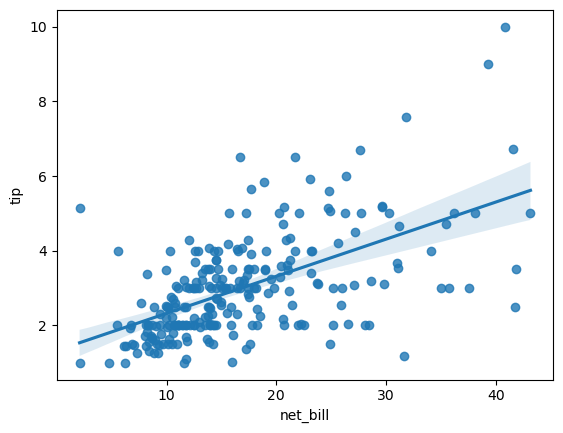

In [3]:
reg1 = smf.ols('tip ~ net_bill', data = tips).fit()

# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips)

In [7]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           5.02e-23
Time:                        13:06:02   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
reg1.params #vemos que , mesmo mantendo os outliers, os parâmetros são mantidos.

Intercept    1.330698
net_bill     0.099334
dtype: float64

<Axes: xlabel='net_bill', ylabel='tip'>

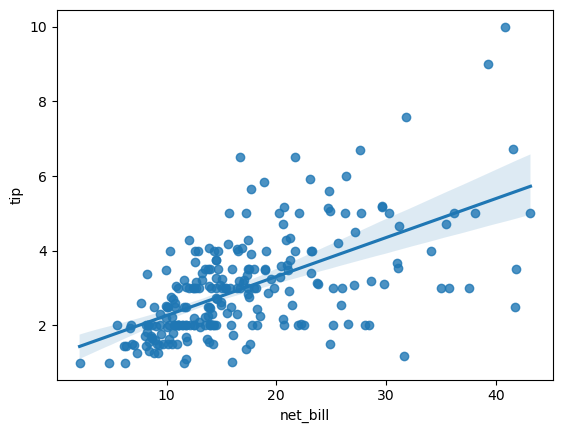

In [5]:
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<0.5])

In [8]:
#regressão ascendente, positiva
round(reg1.rsquared,2)# r² muito baixo

0.33

<Axes: xlabel='net_bill', ylabel='tip'>

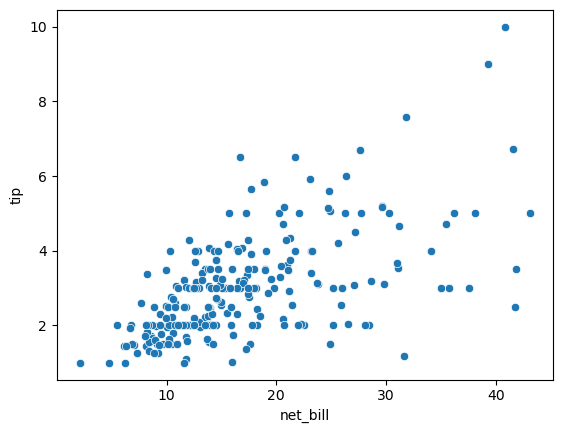

In [11]:
sns.scatterplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<0.5])

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

<Axes: xlabel='tip_pct', ylabel='net_bill'>

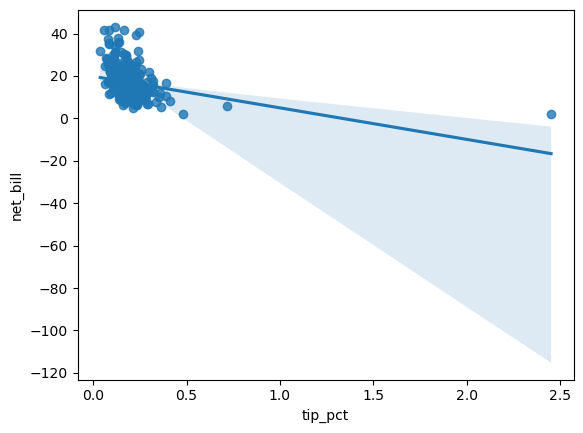

In [12]:
sns.regplot(x = 'tip_pct', y = 'net_bill' , data = tips)

<Axes: xlabel='tip_pct', ylabel='net_bill'>

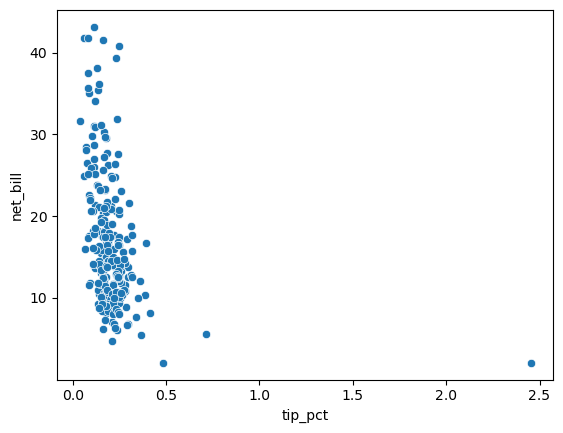

In [13]:
sns.scatterplot(x = 'tip_pct', y = 'net_bill' , data = tips)

In [14]:
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()


In [15]:

reg2.params

Intercept    0.305297
net_bill    -0.006146
dtype: float64

In [16]:

round(reg2.rsquared,2)# r² muito baixo

0.09

In [17]:

# vamos usar a base de dados retirando gorjetas maiores de 50% do valor, para melhor análise

<Axes: xlabel='tip_pct', ylabel='net_bill'>

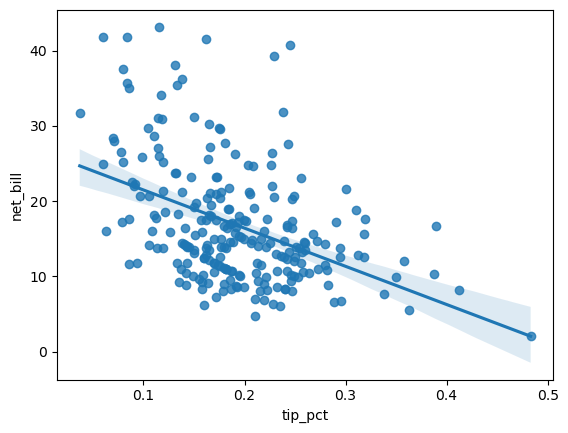

In [18]:
sns.regplot(x = 'tip_pct', y = 'net_bill' , data = tips[tips['tip_pct']<0.5])

<Axes: xlabel='tip_pct', ylabel='net_bill'>

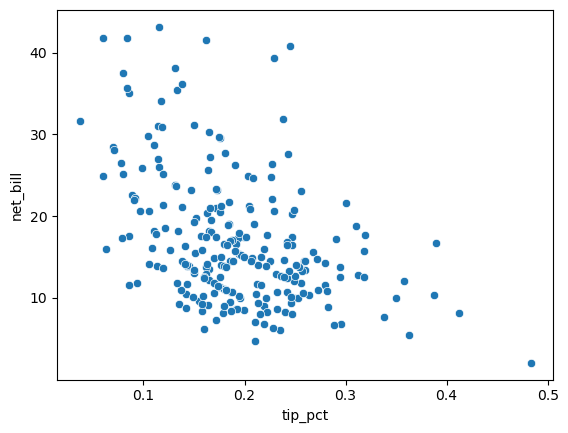

In [19]:
sns.scatterplot(x = 'tip_pct', y = 'net_bill' , data = tips[tips['tip_pct']<0.5])

In [20]:
reg3 = smf.ols('tip_pct ~ net_bill', data = tips[tips['tip_pct']<0.5]).fit()

In [21]:
#regressão descendente, negativa
round(reg3.rsquared,2)# r² muito baixo

0.19

In [22]:
reg3.params

Intercept    0.253815
net_bill    -0.003735
dtype: float64

In [23]:
reg3.summary() # como o net_bill está incoerente , vai ser utilizado a base com os dados completos


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.31e-12
Time:                        13:09:56   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

 Não seria aconselhável, as linhas de regressão estão em sentidos diferentes


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [25]:
#(1)
reg1.fittedvalues

0      2.918050
1      2.192915
2      3.070031
3      3.354125
4      3.414719
         ...   
239    3.626300
240    3.831920
241    3.383925
242    2.926990
243    2.898184
Length: 244, dtype: float64

In [26]:
#(2)
reg2.fittedvalues

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [27]:
#regressão ascendente, positiva
round(reg1.rsquared,2)# r² muito baixo

0.33

4) Valor de 33% apesar de ser bem baixo, supera a valor de 9%, com isso os pontos de estão mais proximos da 
 linha de regressão